# Student grades prediction

#### Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

#### CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
### Predict - CGPA of a student based on different grades in four years.


In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('grades.csv')
df.head(50)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [3]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
df.shape

(571, 43)

### PreProcessing

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [7]:
df.isnull().sum() / df.shape[0]*100

Seat No.      0.000000
PH-121        0.000000
HS-101        0.000000
CY-105        0.175131
HS-105/12     0.175131
MT-111        0.350263
CS-105        0.000000
CS-106        0.350263
EL-102        0.350263
EE-119        0.350263
ME-107        0.350263
CS-107        0.350263
HS-205/20     0.875657
MT-222        0.875657
EE-222        1.225919
MT-224        1.225919
CS-210        1.225919
CS-211        0.875657
CS-203        0.875657
CS-214        1.050788
EE-217        1.050788
CS-212        1.050788
CS-215        1.050788
MT-331        1.576182
EF-303        1.751313
HS-304        1.751313
CS-301        1.751313
CS-302        1.751313
TC-383        1.751313
MT-442        1.751313
EL-332        1.576182
CS-318        1.576182
CS-306        1.576182
CS-312        1.751313
CS-317        2.101576
CS-403        2.101576
CS-421        2.101576
CS-406       14.886165
CS-414        2.276708
CS-419        2.276708
CS-423        2.451839
CS-412       13.835377
CGPA          0.000000
dtype: floa

In [8]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

### Imputing Grades by Using Simple-Imputer Technique (Strategy=most-frequent)

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['CY-105','HS-105/12','MT-111','CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107']])
df[['CY-105','HS-105/12','MT-111','CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107']] = imputer.transform(df[['CY-105','HS-105/12','MT-111','CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107']])
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [11]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[[ 'HS-205/20','MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214','EE-217']])
df[[ 'HS-205/20','MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214','EE-217']] = imputer.transform(df[[ 'HS-205/20','MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214','EE-217']])
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [12]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301','CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306']])
df[['CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301','CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306']] = imputer.transform(df[['CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301','CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306']])
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [13]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['CS-312','CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412']])
df[['CS-312','CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412']] = imputer.transform(df[['CS-312','CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412']])
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [14]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [15]:
df.shape

(571, 43)

In [16]:
df['CGPA'].unique().max()

3.985

In [17]:
df['CGPA'].unique().min()

0.8

In [ ]:
##So our dataset contains a max 3.985 CGPA we can consider an A grade equal to 4 CGPA and min 0.8 CGPA we can consider an F grade equal to 0 CGPA.

In [19]:
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: Seat No. and it value is:
 CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64

Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

Column name is: HS-105/12 and it value is:
 A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype:

#### I consider grades from A+ to F and deleted grades like WU and W because in some columns it is present and I don't think I will contribute to the label, where A+ is 4 CPGA and F is 0 CGPA.

In [20]:
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)

In [21]:
df.reset_index(drop=True,inplace=True)

In [22]:
df.shape


(547, 43)

In [23]:
#confirming all WU and W grades are removed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   547 non-null    object 
 1   PH-121     547 non-null    object 
 2   HS-101     547 non-null    object 
 3   CY-105     547 non-null    object 
 4   HS-105/12  547 non-null    object 
 5   MT-111     547 non-null    object 
 6   CS-105     547 non-null    object 
 7   CS-106     547 non-null    object 
 8   EL-102     547 non-null    object 
 9   EE-119     547 non-null    object 
 10  ME-107     547 non-null    object 
 11  CS-107     547 non-null    object 
 12  HS-205/20  547 non-null    object 
 13  MT-222     547 non-null    object 
 14  EE-222     547 non-null    object 
 15  MT-224     547 non-null    object 
 16  CS-210     547 non-null    object 
 17  CS-211     547 non-null    object 
 18  CS-203     547 non-null    object 
 19  CS-214     547 non-null    object 
 20  EE-217    

### Dividing 4cgpa into 12 equal parts so each grade will get into continuous data.

In [24]:
for column in df.columns:
    df[column]=df[column].replace('A+',4.0)
    df[column]=df[column].replace('A',4.0)
    df[column]=df[column].replace('A-',3.7)
    df[column]=df[column].replace('B+',3.4)
    df[column]=df[column].replace('B',3.0)
    df[column]=df[column].replace('B-',2.7)
    df[column]=df[column].replace('C+',2.4)
    df[column]=df[column].replace('C',2.0)
    df[column]=df[column].replace('C-',1.7)
    df[column]=df[column].replace('D+',1.4)
    df[column]=df[column].replace('D',1.0)
    df[column]=df[column].replace('F',0.0)

In [25]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [26]:
# checking data types of all columns
df.dtypes

Seat No.      object
PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object

In [27]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3.067642,2.657952,3.310055,2.916636,3.047166,3.366728,3.000914,3.019927,3.060878,2.750640,...,2.976234,2.744424,3.140402,2.554662,3.373126,3.491042,3.059232,3.010603,3.342779,2.995388
std,0.936537,0.898506,0.873265,0.988782,0.896047,0.765265,0.827071,0.930312,0.797366,0.995601,...,1.012822,0.845166,0.854419,0.865577,0.704635,0.661342,0.720730,0.860316,0.682592,0.587388
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.700000,2.000000,3.000000,2.000000,2.400000,3.000000,2.700000,2.400000,2.550000,2.000000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.400000,2.700000,2.400000,3.000000,2.587500
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,3.000000,...,3.400000,2.700000,3.400000,2.700000,3.700000,3.700000,3.000000,3.400000,3.700000,3.058000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.474000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


### Observations
1]no null values after treating it

2]Standard deviation are within the range

In [28]:
df.drop(['Seat No.'],axis='columns',inplace=True)

### EDA and Visulization

<function matplotlib.pyplot.show(close=None, block=None)>

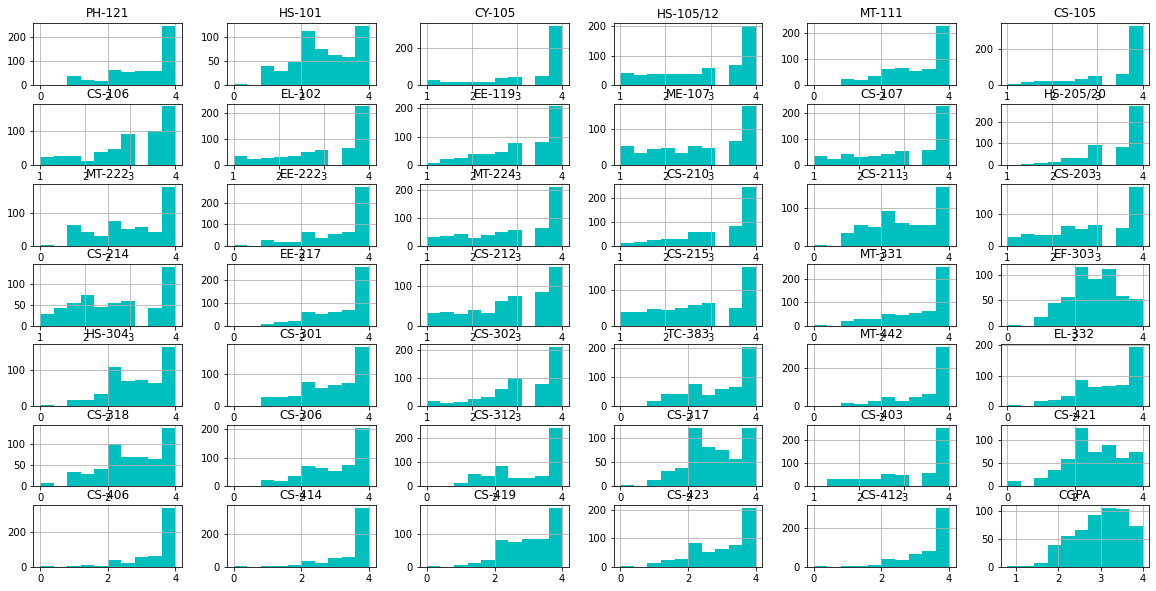

In [30]:
# analyzing the data
df.hist(color='c',figsize=(20,10),bins=10)
plt.show

### Plotting Distribution plot to see skewness

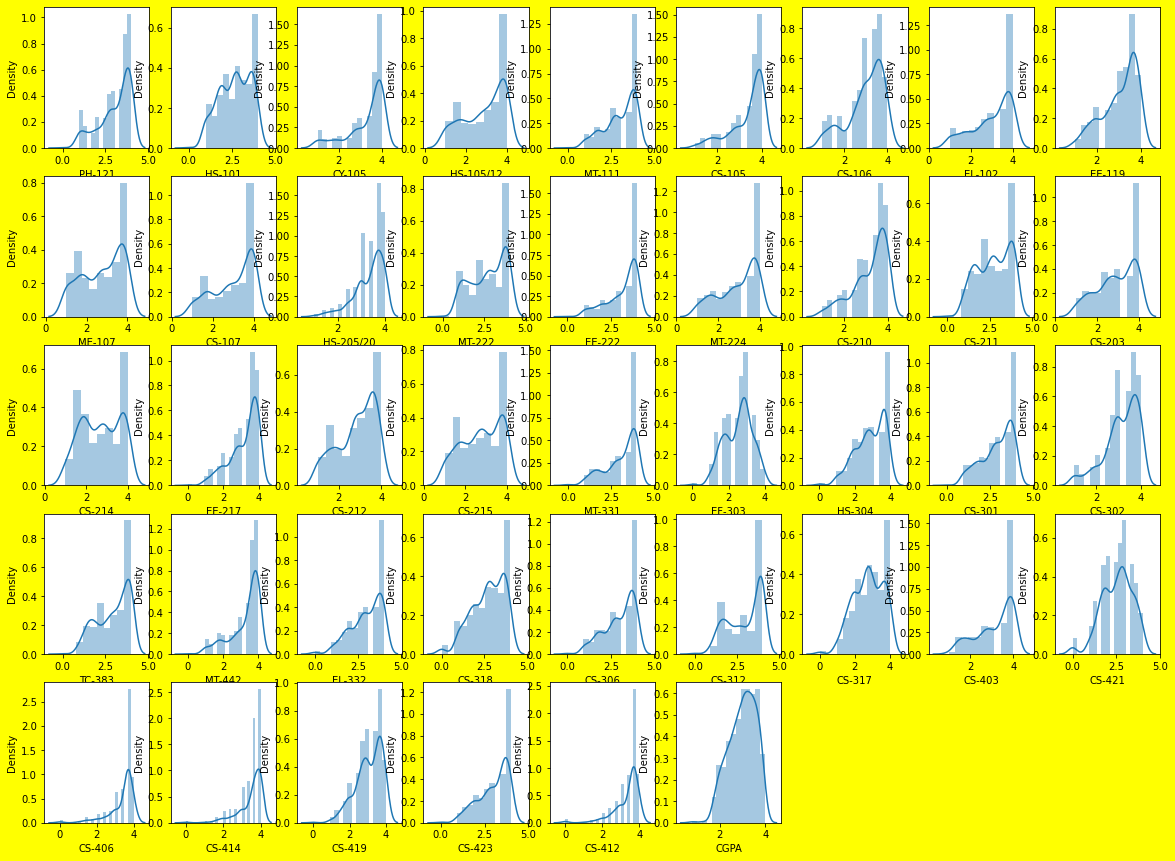

In [31]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 45:
        ax = plt.subplot(5,9,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

In [32]:
# so we observe some skewness in the dataset

In [33]:
X = df.drop(['CGPA'],axis = 1)
y = df['CGPA']

#### Plotting Scatter plot to see relation between feature and label

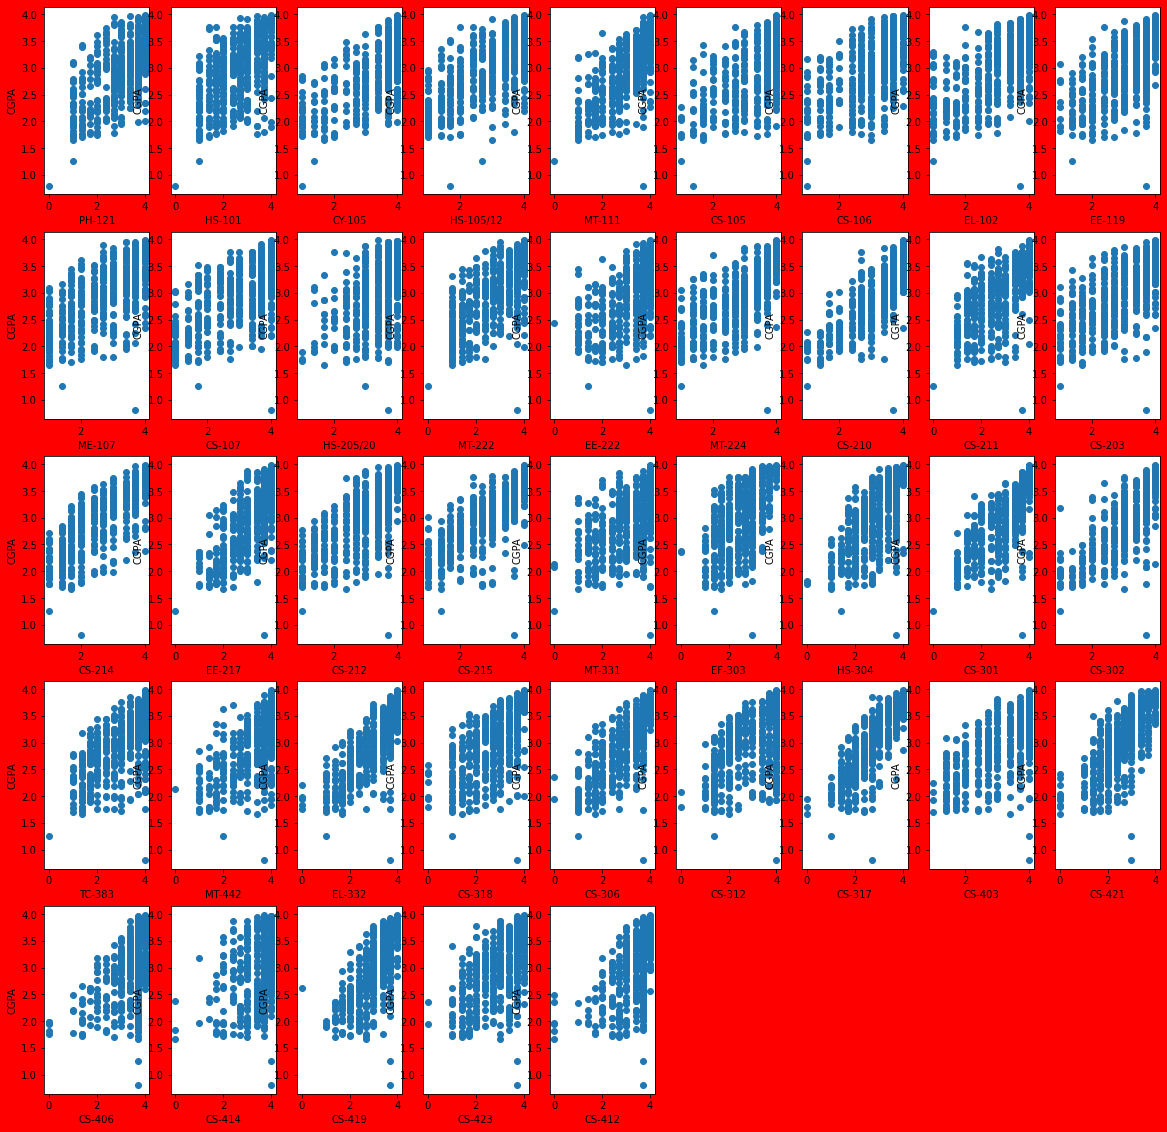

In [34]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,20) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 45:
        ax = plt.subplot(5,9,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('CGPA' , fontsize = 10)
    plotnumber += 1
plt.show()

### plotting boxplot to see outliers

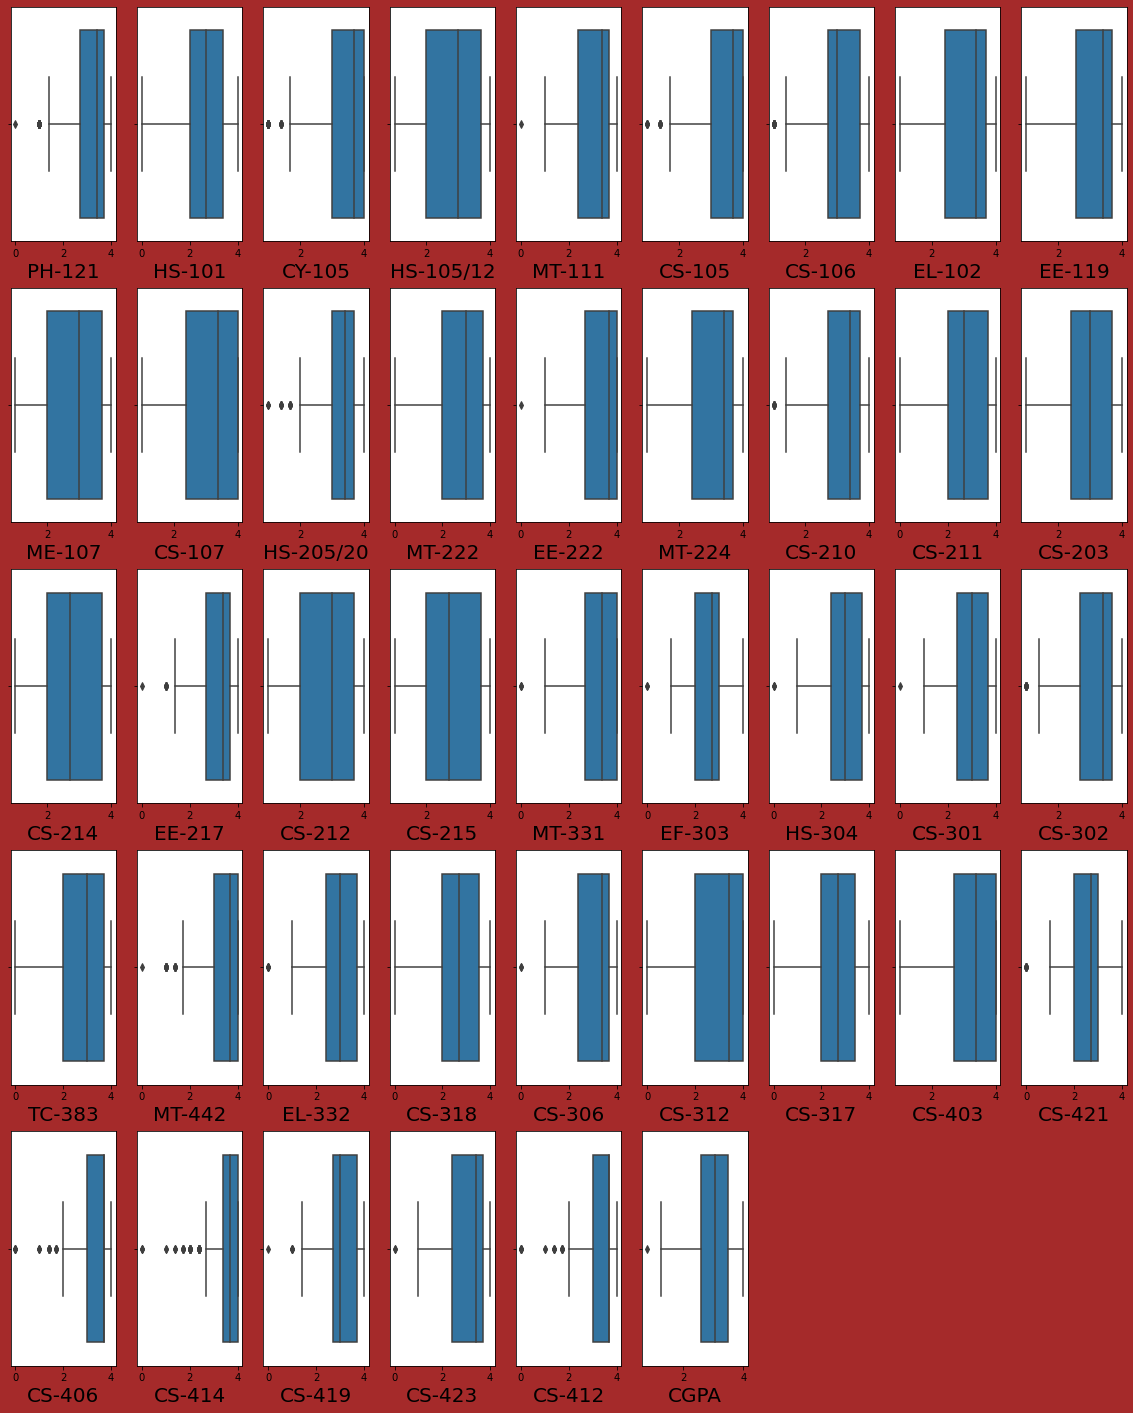

In [37]:
plt.figure(figsize=(20,25) , facecolor = 'brown')
graph = 1

for column in df:
    
    if graph <= 45:
        plt.subplot (5,9,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

In [38]:
#skewness in terms of number
X.skew().sort_values(ascending=False)

CS-214      -0.082832
HS-101      -0.260073
CS-211      -0.261906
EF-303      -0.301034
CS-215      -0.306944
CS-317      -0.320288
ME-107      -0.354597
MT-222      -0.379749
CS-421      -0.454525
CS-203      -0.487893
CS-312      -0.515075
TC-383      -0.543103
HS-105/12   -0.563794
CS-318      -0.575936
CS-212      -0.591061
MT-224      -0.641933
CS-107      -0.645613
HS-304      -0.648938
CS-301      -0.673505
CS-403      -0.753622
CS-419      -0.756138
EL-332      -0.764509
CS-306      -0.765317
EL-102      -0.768397
EE-119      -0.772804
MT-111      -0.779360
CS-423      -0.786411
CS-106      -0.902728
PH-121      -0.913474
MT-331      -0.935467
CS-302      -0.974971
CS-210      -1.002362
EE-217      -1.017358
EE-222      -1.069515
HS-205/20   -1.198672
MT-442      -1.286879
CS-105      -1.322190
CY-105      -1.344620
CS-414      -1.971622
CS-412      -2.069588
CS-406      -2.116942
dtype: float64

In [39]:
#applying Power Transformation beacuse our dataset is small and we want to keep outlier
from sklearn.preprocessing import power_transform , PowerTransformer
pt=PowerTransformer()

In [40]:
#transformed data
X_scaled=pt.fit_transform(X)
X_scaled

array([[-0.64101481, -1.3759334 , -1.70001614, ..., -1.68621053,
        -0.19036276,  0.52459624],
       [ 1.17615759, -1.7570158 , -1.78746383, ..., -1.42805839,
        -1.23753359, -0.90081152],
       [ 1.17615759,  0.34969987,  0.98761133, ...,  1.53600247,
         0.8324279 ,  1.42295862],
       ...,
       [-0.30520338,  1.561638  ,  0.32811098, ...,  0.39934358,
         0.8324279 ,  0.52459624],
       [ 1.17615759,  0.82352772, -1.8611243 , ..., -0.23507929,
        -0.55326471, -1.84708643],
       [-1.25403328, -1.7570158 , -1.8611243 , ...,  0.39934358,
        -1.86270819, -1.97824837]])

In [41]:
#again checking the skewness
pd.DataFrame(X_scaled,columns=X.columns).skew().sort_values(ascending=False)

EF-303      -0.086011
CS-421      -0.091495
CS-214      -0.102057
CS-317      -0.102724
HS-101      -0.131527
CS-211      -0.158875
CS-215      -0.170999
CS-419      -0.186691
CS-318      -0.195453
HS-304      -0.201632
ME-107      -0.208334
CS-203      -0.212969
MT-222      -0.225056
CS-212      -0.238568
CS-302      -0.242615
EL-332      -0.256052
CS-301      -0.263149
TC-383      -0.266414
EE-119      -0.275210
CS-106      -0.279099
HS-205/20   -0.279677
HS-105/12   -0.286633
CS-306      -0.287707
CS-423      -0.287855
CS-312      -0.298530
MT-224      -0.300885
MT-111      -0.307597
CS-107      -0.318241
EL-102      -0.329851
CS-403      -0.335213
CS-210      -0.337052
EE-217      -0.353971
PH-121      -0.377015
MT-331      -0.394096
EE-222      -0.442841
CS-412      -0.447590
CS-105      -0.507097
MT-442      -0.519390
CS-414      -0.534826
CS-406      -0.539505
CY-105      -0.574563
dtype: float64

In [42]:
#we will convert numpy array into dataframe
X_new=pd.DataFrame(X_scaled,columns=X.columns)

In [43]:
#we will convert numpy array into dataframe
X_new=pd.DataFrame(X_scaled,columns=X.columns)
X_new.skew().sort_values(ascending=False)

EF-303      -0.086011
CS-421      -0.091495
CS-214      -0.102057
CS-317      -0.102724
HS-101      -0.131527
CS-211      -0.158875
CS-215      -0.170999
CS-419      -0.186691
CS-318      -0.195453
HS-304      -0.201632
ME-107      -0.208334
CS-203      -0.212969
MT-222      -0.225056
CS-212      -0.238568
CS-302      -0.242615
EL-332      -0.256052
CS-301      -0.263149
TC-383      -0.266414
EE-119      -0.275210
CS-106      -0.279099
HS-205/20   -0.279677
HS-105/12   -0.286633
CS-306      -0.287707
CS-423      -0.287855
CS-312      -0.298530
MT-224      -0.300885
MT-111      -0.307597
CS-107      -0.318241
EL-102      -0.329851
CS-403      -0.335213
CS-210      -0.337052
EE-217      -0.353971
PH-121      -0.377015
MT-331      -0.394096
EE-222      -0.442841
CS-412      -0.447590
CS-105      -0.507097
MT-442      -0.519390
CS-414      -0.534826
CS-406      -0.539505
CY-105      -0.574563
dtype: float64

### Seeing how data is disrtibuted after treating skewness

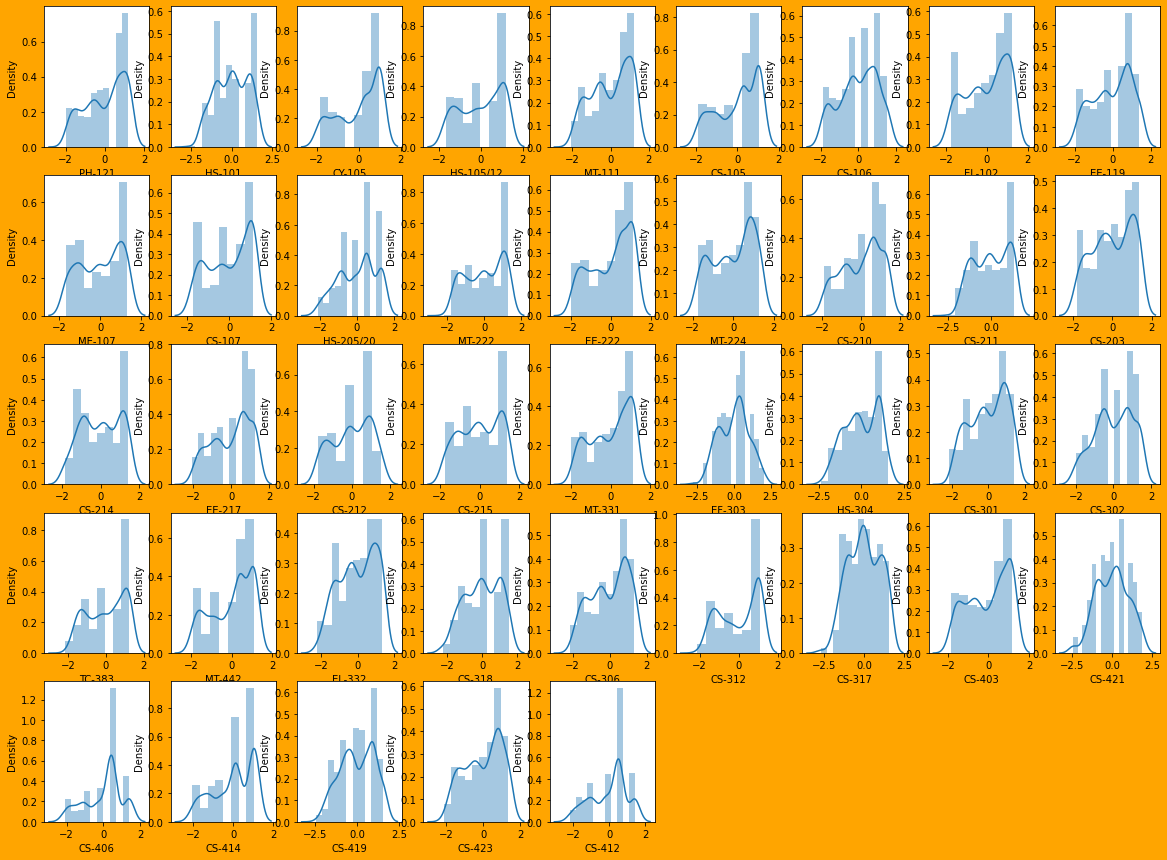

In [44]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'orange')
plotnumber = 1

for column in X_new:
    if plotnumber <= 45:
        ax = plt.subplot(5,9,plotnumber)
        sns.distplot (X_new[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

# Seeing outliers after treating outliers

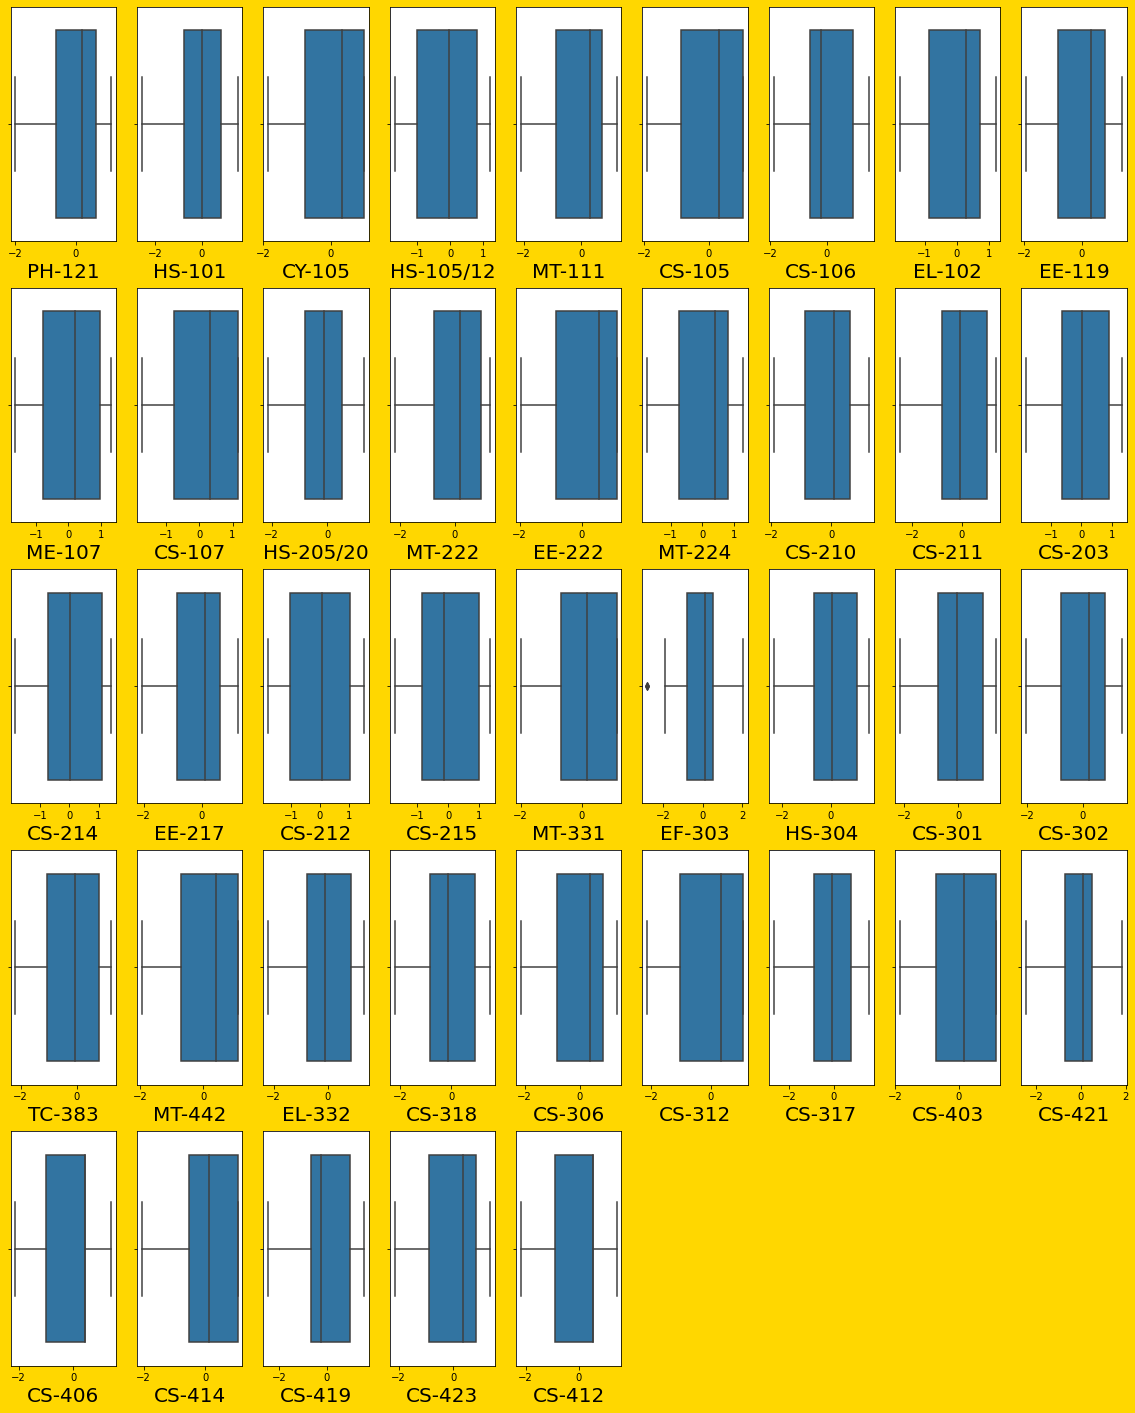

In [47]:
plt.figure(figsize=(20,25) , facecolor = 'gold')
graph = 1

for column in X_new:
    
    if graph <= 45:
        plt.subplot (5,9,graph)
        ax = sns.boxplot(X_new[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

#### Thus we have removed all the skewness and outliers and now our dataset almost looks like the normal distribution.

In [48]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,11):
    X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)
        

Training Score 0.9505032166264651 RandomState 0
Testing Score 0.9806518392642796 RandomState 0


MAXINING TESTING SCORE 0.9806518392642796 ON RANDOM STATE OF 0
Training Score 0.9526736399827556 RandomState 1
Testing Score 0.9808847037356404 RandomState 1


MAXINING TESTING SCORE 0.9808847037356404 ON RANDOM STATE OF 1
Training Score 0.9563402629999216 RandomState 2
Testing Score 0.967588637403392 RandomState 2


Training Score 0.988343242042032 RandomState 3
Testing Score 0.8522517247053794 RandomState 3


Training Score 0.953048857530002 RandomState 4
Testing Score 0.97256956784051 RandomState 4


Training Score 0.9563778634320298 RandomState 5
Testing Score 0.9676870045794647 RandomState 5


Training Score 0.9506013222840436 RandomState 6
Testing Score 0.9825527861126095 RandomState 6


MAXINING TESTING SCORE 0.9825527861126095 ON RANDOM STATE OF 6
Training Score 0.9880047007836419 RandomState 7
Testing Score 0.8521669757451126 RandomState 7


Training Score 0.9534680169037623 Random

In [49]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9825527861126095 On Random State 6


# Training the model

In [50]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=6)

In [51]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [52]:
#training score
regression.score(X_train,y_train)  

0.9506013222840436

In [53]:
#testing score
regression.score(X_test,y_test)     

0.9825527861126095

# Model Score
### Training Score = 95.06013222840385 %
### Testing Score = 98.2552786112594 %

In [54]:
y_pred=regression.predict(X_test)
y_pred

array([3.16631765, 2.43954348, 2.84560263, 3.98689864, 3.02174943,
       2.07743406, 2.61360336, 2.75385535, 2.26431336, 2.77848798,
       3.10538593, 2.70766557, 3.56794083, 2.53849075, 1.74996564,
       3.46409534, 2.12812163, 4.04048027, 2.91303064, 2.78171104,
       3.12078865, 2.38938962, 4.01583246, 1.8703596 , 2.90052503,
       2.18251667, 3.55969058, 3.28261845, 2.67376459, 3.53253483,
       2.85798935, 3.45146913, 2.26454448, 3.43090561, 2.26948779,
       2.98848035, 4.02566155, 3.50964721, 3.04906772, 2.80158501,
       3.15423561, 2.77569643, 2.14629834, 3.7076836 , 2.12017124,
       2.43038063, 3.94144371, 3.90563789, 3.55618102, 3.53264152,
       3.90664848, 2.21580314, 3.15520266, 2.61908674, 3.74545345,
       3.82325815, 2.93566816, 4.07931375, 3.07352586, 2.4581439 ,
       3.2378602 , 2.41929767, 2.1789373 , 2.65903913, 3.29111921,
       2.6569446 , 2.79047   , 3.02143004, 2.29505801, 3.58074456,
       4.0145598 , 1.77304737, 2.7431938 , 3.3595694 , 3.17975

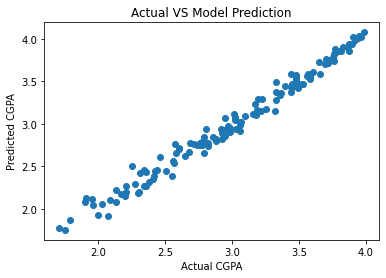

In [55]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual VS Model Prediction')
plt.show()

# Checking MAE , MSE & RMSE scores

In [56]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [57]:
# again predict 
y_pred = regression.predict(X_test)

In [58]:
#MAE
mean_absolute_error(y_test,y_pred)

0.06256401089683786

In [59]:
#MSE
mean_squared_error(y_test,y_pred)

0.00628721082157246

In [61]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.07929193415204638

In [62]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# Scores
##### MAE SCORE = 0.06256401089689284
##### MSE SCORE = 0.006287210821578076
##### RMSE SCORE = 0.0792919341520818

# LASSO MODEL

In [64]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None, max_iter = 100)

lasscv.fit(X_train, y_train)

LassoCV(max_iter=100)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [65]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

0.004556544240023257

In [66]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.004556544240023257)

In [67]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.004556544240023257)

In [73]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.9847549978883469

# RIDGE MODEL

In [69]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01))

ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [70]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [71]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [72]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.982569934508408

## SCORES
#### LASSO SCORES = 98.47549978883469 %
#### RIDGE SCORES = 98.25699345083924 %

# Cross-Vaildation Score

In [74]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X_new,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.8261457174235253 and the R2 score for Training is 0.9506013222840436 and R2 score for the Testing is0.9825527861126095


At cross fold 3 the cv score is 0.9000095991063111 and the R2 score for Training is 0.9506013222840436 and R2 score for the Testing is0.9825527861126095


At cross fold 4 the cv score is 0.8809536134539063 and the R2 score for Training is 0.9506013222840436 and R2 score for the Testing is0.9825527861126095


At cross fold 5 the cv score is 0.9379906565563635 and the R2 score for Training is 0.9506013222840436 and R2 score for the Testing is0.9825527861126095


At cross fold 6 the cv score is 0.9380588424646304 and the R2 score for Training is 0.9506013222840436 and R2 score for the Testing is0.9825527861126095


At cross fold 7 the cv score is 0.9433121796331131 and the R2 score for Training is 0.9506013222840436 and R2 score for the Testing is0.9825527861126095


At cross fold 8 the cv score is 0.9435649610071823 and the R2 score fo

### Cross-Validation Score
#### Training Score = 95.06013222840385 %
#### Testing Score = 98.2552786112594 %

# ADA BOOST MODEL

In [75]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV  #GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Training the model

In [76]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=6)

In [77]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [78]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [79]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9431062182835575


In [80]:
# model prediction on testing datadet
pred = ada.predict(X_test)


In [81]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9215380180923426


### Model Scores
#### Training Score = 94.31062182835575 %
#### testing Score = 92.15380180923426 %

## Hyperparameter Tuning for Ada Boost

In [82]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [83]:
params = {
rnd_srch.best_params_'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [84]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [85]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [86]:

rnd_srch.best_params_

{'n_estimators': 70, 'learning_rate': 0.25}

In [87]:

rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=70)

In [88]:
ada = AdaBoostRegressor(learning_rate=0.4, n_estimators=53)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

=== Testing Score ===
0.921906293486594


#### Model Score after Hyperparameter Tuning
##### Testing Score = 92.1906293486594 %

# Cross Validation for Ada Boost

In [90]:
#Cross Vaildation
training=ada.score(X_train,y_train)
testing=ada.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,X_new,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.8680916916129588 and the R2 score for Training is 0.9485143328511091 and R2 score for the Testing is0.921906293486594


At cross fold 3 the cv score is 0.8737336587018367 and the R2 score for Training is 0.9485143328511091 and R2 score for the Testing is0.921906293486594


At cross fold 4 the cv score is 0.8569773741525061 and the R2 score for Training is 0.9485143328511091 and R2 score for the Testing is0.921906293486594


At cross fold 5 the cv score is 0.8697669185034341 and the R2 score for Training is 0.9485143328511091 and R2 score for the Testing is0.921906293486594


At cross fold 6 the cv score is 0.8763733011091955 and the R2 score for Training is 0.9485143328511091 and R2 score for the Testing is0.921906293486594


At cross fold 7 the cv score is 0.8741083400974246 and the R2 score for Training is 0.9485143328511091 and R2 score for the Testing is0.921906293486594


At cross fold 8 the cv score is 0.8694634495801692 and the R2 score for Trai

### Cross Validation score
##### Training score = 92.1906293486594 %
##### Testing Score = 92.1906293486594 %

# KNN MODEL

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [92]:
# define parameters
parameterss={'algorithm':['kd_tree' , 'brute'],
           'leaf_size':[3,5,10,15,30],
           'n_neighbors':[3,15,7,50,20]}

In [93]:
knn=KNeighborsRegressor()
clf=clf=GridSearchCV(knn,parameterss)
clf.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 10, 15, 30],
                         'n_neighbors': [3, 15, 7, 50, 20]})

In [94]:
#print best parameters
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 20}


In [95]:
#reassign best parameters
knn=KNeighborsRegressor(algorithm= 'kd_tree', leaf_size= 3, n_neighbors= 15)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=15)

In [96]:
print ('Training R2 Score: ' ,knn.score(X_train,y_train)*100)

Training R2 Score:  93.11873170619238


In [97]:
pred_decision=knn.predict(X_test)

In [98]:
from sklearn.metrics import r2_score
rfs = r2_score(y_test,pred_decision)
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 97.9970719457158


## Model Score after Hyperparameter Tuning
#### Training Score = 93.11873170619238 %
#### Testing Score = 97.9970719457158 %

# Cross Validation For KNNeighbors

In [99]:
#Cross Vaildation
training=knn.score(X_train,y_train)
testing=knn.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(knn,X_new,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.9028329854673406 and the R2 score for Training is 0.9311873170619238 and R2 score for the Testing is0.979970719457158


At cross fold 3 the cv score is 0.9307674666771605 and the R2 score for Training is 0.9311873170619238 and R2 score for the Testing is0.979970719457158


At cross fold 4 the cv score is 0.9269573293953195 and the R2 score for Training is 0.9311873170619238 and R2 score for the Testing is0.979970719457158


At cross fold 5 the cv score is 0.9371794881391786 and the R2 score for Training is 0.9311873170619238 and R2 score for the Testing is0.979970719457158


At cross fold 6 the cv score is 0.9390558814986568 and the R2 score for Training is 0.9311873170619238 and R2 score for the Testing is0.979970719457158


At cross fold 7 the cv score is 0.9410278699452393 and the R2 score for Training is 0.9311873170619238 and R2 score for the Testing is0.979970719457158


At cross fold 8 the cv score is 0.9426823451794598 and the R2 score for Trai

### Cross Validation score
### Training score = 93.11873170619238 %
### Testing Score = 97.9970719457158 %

# RANDOM FOREST

In [100]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [101]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [102]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [103]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 11}


In [109]:

rf = RandomForestRegressor(criterion='mean_squared_error', poisson, max_depth=15, max_features='log2', min_samples_leaf=1, min_samples_split=11)
rf.fit(X_train, y_train)

SyntaxError: positional argument follows keyword argument (CreatorTemp/ipykernel_14824/2877205133.py, line 2)

In [116]:
# reassign best parameters
rf = RandomForestRegressor(criterion='mse', max_depth=15, max_features='log2', min_samples_leaf=1, min_samples_split=11)